# $Simulation$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
import viz # curriculum example visualizations

np.random.seed(9)

### 1. How likely is it that you roll doubles when rolling two dice?

In [14]:
# set up random choice for dice
n_trials = nrows = 10_000
n_dice = ncols = 2

rolls = np.random.choice([1, 2, 3, 4, 5, 6], size = (n_trials, n_dice))
rolls

array([[1, 1],
       [6, 5],
       [2, 6],
       ...,
       [6, 6],
       [5, 5],
       [4, 1]])

In [34]:
# convert data to DataFrame
df = pd.DataFrame(rolls, columns=['roll_1', 'roll_2'])
df.shape

(10000, 2)

In [27]:
#create a True and False based on condition 
bool_mask = df.roll_1.values == df.roll_2.values

In [37]:
# probability of rolling double dice by using division
bool_mask.sum()/bool_mask.size

0.1636

In [54]:
#probability of rolling double dice
bool_mask.mean()

0.1636

### 2. If you flip 8 coins, what is the probability of getting exactly 3 heads? What is the probability of getting more than 3 heads?


In [42]:
n_trials = nrows = 10_000
n_coins = ncols = 8

# 1 equals heads, 0 equals tails
flips = np.random.choice([0, 1], size = (n_trials, n_coins))
flips

array([[1, 0, 0, ..., 1, 1, 1],
       [1, 0, 1, ..., 0, 1, 1],
       [1, 0, 1, ..., 0, 1, 1],
       ...,
       [1, 0, 0, ..., 0, 0, 1],
       [1, 1, 0, ..., 0, 1, 0],
       [1, 1, 0, ..., 1, 1, 1]])

In [47]:
# create data frame and label columns
flips_df = pd.DataFrame(flips, columns=['1st','2nd','3rd','4th','5th','6th','7th','8th'])
flips_df.head()

,1st,2nd,3rd,4th,5th,6th,7th,8th
0,1,0,0,1,1,1,1,1
1,1,0,1,0,0,0,1,1
2,1,0,1,0,0,0,1,1
3,0,0,0,1,0,1,1,0
4,1,0,1,1,0,1,0,1


In [50]:
#sum vertically of observations of heads
total_heads= flips_df.sum(axis=1)
total_heads.head()

0    6
1    4
2    4
3    3
4    5
dtype: int64

In [52]:
# probability of getting 3 heads is 0.2188
(total_heads ==3).mean()

0.2188

In [55]:
#probablity of getting more than 3 heads is 0.6337
(total_heads > 3).mean()

0.6337

### 3. There are approximately 3 web development cohorts for every 1 data science cohort at Codeup. Assuming that Codeup randomly selects an alumni to put on a billboard, what are the odds that the two billboards I drive past both have data science students on them?


In [81]:
# set up random generation of data using random . choice
n_trials = nrows = 10_000
n_students = ncols = 2

# 0 = Web Development students, 1=Data Science students
billboard = np.random.choice([0,0,0,1], size = (n_trials, n_students))


In [86]:
# create data frame  with columns
billboard_df = pd.DataFrame(billboard, columns=['1st','2nd'])
billboard_df.tail()

,1st,2nd
9995,0,1
9996,0,0
9997,1,0
9998,0,0
9999,1,0


In [95]:
# probability of two data science students selected on a billboard
((billboard_df.sum(axis=1) == 2).sum())/len(billboard_df)


0.0643

### 4. Codeup students buy, on average, 3 poptart packages with a standard deviation of 1.5 a day from the snack vending machine. If on monday the machine is restocked with 17 poptart packages, how likely is it that I will be able to buy some poptarts on Friday afternoon? (Remember, if you have mean and standard deviation, use the np.random.normal) You'll need to make a judgement call on how to handle some of your values.


In [7]:
# assumption 17 is the total of poptarts
# set up for random . normal data
nrows = 10_000
monday = 17

array_pop = np.random.normal(loc = 3 , scale = 1.5, size=(nrows,5))

In [8]:
# sum or poptarts taken away in 5 days.
sum_pop= array_pop.sum(axis=1)

In [9]:
sum_pop

array([20.3785861 , 13.59100975, 15.5121466 , ..., 13.2624069 ,
       14.60890501, 16.36535157])

(array([  14.,  112.,  603., 1756., 2962., 2731., 1403.,  353.,   59.,
           7.]),
 array([-2.84331236, -1.64326882, -0.44322527,  0.75681828,  1.95686182,
         3.15690537,  4.35694891,  5.55699246,  6.75703601,  7.95707955,
         9.1571231 ]),
 <BarContainer object of 10 artists>)

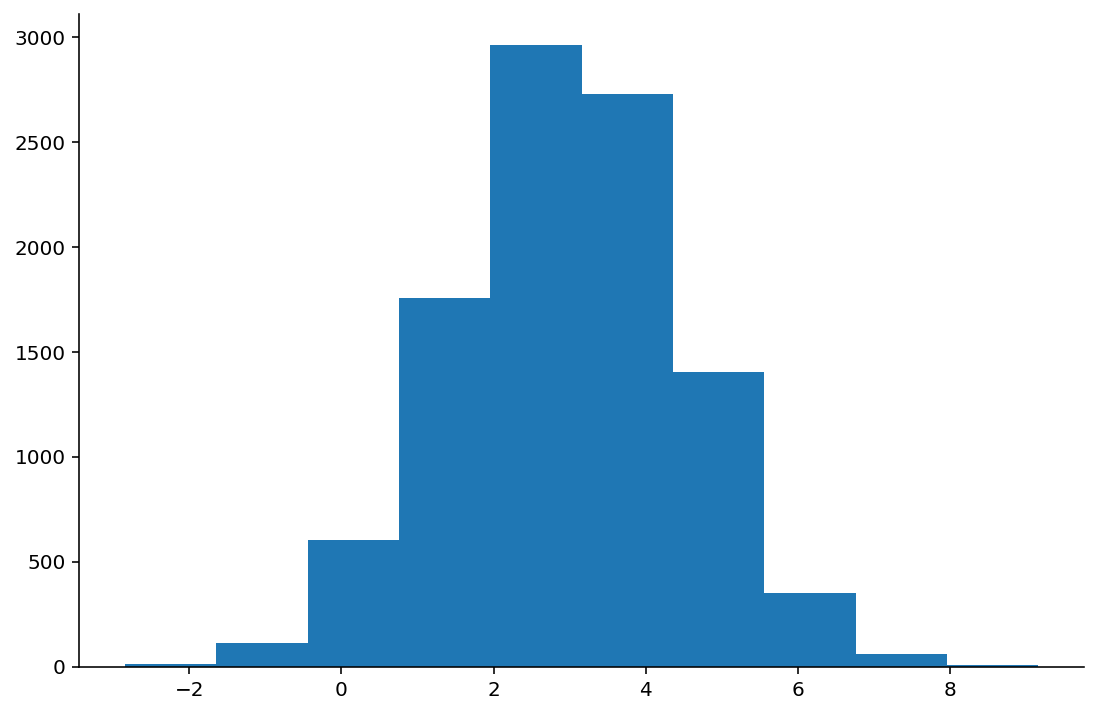

In [10]:
plt.hist(np.random.normal(3,1.5, size =(10_000)))

In [14]:
# instances when the sum is less than 16, there should be at least one poptart left
bool_mask = sum_pop <= 16                     

In [12]:
bool_mask.sum()/len(bool_mask)

0.6255

In [13]:
# probability that I will be able to buy poptarts on Friday
bool_mask.mean()

0.6255

### 5. Compare Heights
* Men have an average height of 178 cm and standard deviation of 8cm.
* Women have a mean of 170, sd = 6cm.
* Since you have means and standard deviations, you can use np.random.normal to generate observations.
* If a man and woman are chosen at random, what is the likelihood the woman is taller than the man?

In [15]:
# creating random heights for men given a mean and std
nrows = 10_000
men_random = np.random.normal(loc = 178, scale =8, size = (nrows,1))
men_random

array([[178.28202969],
       [173.65421458],
       [180.43279203],
       ...,
       [172.85828193],
       [188.51587497],
       [181.37482601]])

In [16]:
# creating random heights for women given a mean and std
women_random = np.random.normal(loc = 170, scale =6, size = (nrows,1))
women_random

array([[180.12187735],
       [166.08143346],
       [176.43473814],
       ...,
       [175.29705434],
       [173.96876894],
       [174.71427652]])

In [97]:
#conbining random heights into one array
combine = np.concatenate((women_random,men_random), axis =1)

In [98]:
#converting array to a datafram
combine_df = pd.DataFrame(combine, columns = {'men','women'})


In [99]:
#checking dataframe type
combine_df.dtypes

women    float64
men      float64
dtype: object

In [100]:
# creating a True and False Series based on the condition that women are taller than men
bool_mask = combine_df.women > combine_df.men
bool_mask

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996     True
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [101]:
# The probability that a women chosen at random is taller than a man chosen at random
bool_mask.mean()

0.2074

In [17]:
# Alternative code
(women_random > men_random).mean()

0.2176

### 6. When installing anaconda on a student's computer, there's a 1 in 250 chance that the download is corrupted and the installation fails.

* What are the odds that after having 50 students download anaconda, no one has an installation issue? 100 students?
* What is the probability that we observe an installation issue within the first 150 students that download anaconda?
* How likely is it that 450 students all download anaconda without an issue?


In [ ]:
#probability for 100 students no issues

In [92]:
# function that outputs the probability of corruption occuring ; given input is the number of students
def p_corruption(n_students):
    data = np.random.random((10_000, n_students))
    corruption = data < (1/250)
    return (corruption.sum(axis=1)>=1).mean() 


In [94]:
p_corruption(50)

0.1811

In [83]:
# set up the probability of corruction and size of trials
p_corrupted = 1/250
n_students = ncols = 450
nrows = 10_000


In [84]:
# run random trials
data = np.random.random((nrows, ncols))
data.size


4500000

In [85]:
corruption = data < p_corrupted
corruption

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [86]:
corruption.sum(axis=1)

array([1, 2, 3, ..., 3, 6, 1])

In [66]:
# at 250 students there is a .6249 probability or corruption and .3751 of no corruption
(corruption.sum(axis=1)>=1).mean() 

0.6249

In [76]:
# at 50 students there is a .1811 probability of corruption and .8189 or no corruption
1-(corruption.sum(axis=1)>=1).mean() 

0.8189

In [82]:
# at 150 students there is an .4555 probability of corruption and .5445 probability of no corruption
1- (corruption.sum(axis=1)>=1).mean() 

0.5445

In [88]:
# at 450 students there is an .83358 probability of corrupion and .1642 probability of no corruption
1-(corruption.sum(axis=1)>=1).mean() 

0.1642

#### Alternative code -----------------------------

In [18]:
### ALternative code
install = np.random.choice([0,1], size =(10000, 50), p = [249/250, 1/250])

In [20]:
### ALternative code
# probability of no issues for 50 students
(install.sum(axis=1)== 0).mean()

0.8178

In [21]:
### ALternative code
# probability for 100 students (0) issues
install = np.random.choice([0,1], size =(10000, 100), p = [249/250, 1/250])
(install.sum(axis=1)== 0).mean()

0.6732

In [23]:
### ALternative code
# probability for 150 students having some issues
install = np.random.choice([0,1], size =(10000, 150), p = [249/250, 1/250])
(install.sum(axis=1)> 0).mean()

0.45

In [24]:
### ALternative code
# probability for 450 students having no issues
install = np.random.choice([0,1], size =(10000, 450), p = [249/250, 1/250])
(install.sum(axis=1)== 0).mean()

0.1631

### 7. There's a 70% chance on any given day that there will be at least one food truck at Travis Park.
* However, you haven't seen a food truck there in 3 days. How unlikely is this?
* How likely is it that a food truck will show up sometime this week?

In [29]:
# generating random.random data
p_truck =.7

ncols = 3
nrows = 10_000


In [30]:
data = np.random.random((nrows, ncols))
data


array([[0.08790317, 0.7860511 , 0.96098605],
       [0.02029372, 0.2450709 , 0.99327648],
       [0.56608067, 0.31366405, 0.59761487],
       ...,
       [0.69859878, 0.15173811, 0.146526  ],
       [0.78933785, 0.40968218, 0.2239289 ],
       [0.50802847, 0.68675062, 0.60764047]])

In [31]:
food_truck = (data <= p_truck)


In [32]:
#probability of food truck not showing up 3 days in a row
(food_truck.sum(axis=1)==0).mean()

0.0283

### Alternative code  ---------

In [27]:
trucks = np.random.choice([0,1], size = (10000, 3), p =[.3,.7])

In [28]:
(trucks.sum(axis =1)==0).mean()

0.0277

### 8. If 23 people are in the same room, what are the odds that two of them share a birthday? What if it's 20 people? 40?

In [33]:
# we similate 1000 rooms,each with 23 people in them
bd = np.random.choice(range(1,366), size = (10000,23))
bd

array([[214, 228, 322, ..., 115,  15,  55],
       [227, 225, 176, ..., 146, 298,  71],
       [ 14, 151,  20, ...,   3, 106, 271],
       ...,
       [302,  74,  88, ...,  43, 351,  49],
       [213,  35,  62, ..., 319, 154, 323],
       [284,  88, 110, ..., 348, 145, 137]])

In [34]:
# unique birthdays should be 23 unless there is doubles
pd.DataFrame(bd).nunique(axis =1)

0       23
1       22
2       23
3       23
4       22
        ..
9995    23
9996    23
9997    23
9998    22
9999    22
Length: 10000, dtype: int64

In [35]:
# percentage of rooms with a shared birthday
(pd.DataFrame(bd).nunique(axis =1)< 23).mean()

0.5073

In [37]:
# what about the probability 20 people sharing a birthday
bd = np.random.choice(range(1,366), size = (10000,20))
pd.DataFrame(bd).nunique(axis =1)
(pd.DataFrame(bd).nunique(axis =1)< 20).mean()



0.4145

In [38]:
# what about the probability of 40 people sharing a birthday
bd = np.random.choice(range(1,366), size = (10000,40))
pd.DataFrame(bd).nunique(axis =1)
(pd.DataFrame(bd).nunique(axis =1)< 40).mean()



0.8954